
# Esta es una prueba libre.

Consiste en tomar uno de los datasets incorporados en la biblioteca statsmodels y hacer un análisis estadístico, llegando a regresión si el problema es apropiado para ello. Se trata de hacer un estudio descriptivo y posteriormente, explorar los datos y llegar a hacer contraste de hipótesis, o algún modelo básico de regresión (sin entrar en modelos de aprendizaje automático adicionales, ya que esto es materia de otro módulo).

Nota: Por conveniencia he dejado los comentarios en ingles, ya que me he basado en tutoriales que ya venian en ese idioma.

## 1. Importing Libraries

Here are the imports that we will need thoriught the code.

In [1]:
# imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

## 2. Load dataset

We can use a utility function to load any R dataset available from the Rdatasets package

In [2]:
data = sm.datasets.get_rdataset("longley", "datasets", cache=True).data
data.head()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221


## 3. Explore dataset

We will explore the data both analytically & graphically. Ultimately, is always a good idea to plot the data because it makes the relationship between variables the more obvious.

In [3]:
data.describe()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
count,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000
mean,101.681250,387.698438,319.331250,260.66875,117.424000,1954.500000,65.317000
std,10.791553,99.394938,93.446425,69.59196,6.956102,4.760952,3.511968
min,83.000000,234.289000,187.000000,145.60000,107.608000,1947.000000,60.171000
25%,94.525000,317.881000,234.825000,229.80000,111.788500,1950.750000,62.712500
50%,100.600000,381.427000,314.350000,271.75000,116.803500,1954.500000,65.504000
75%,111.250000,454.085500,384.250000,306.07500,122.304000,1958.250000,68.290500
max,116.900000,554.894000,480.600000,359.40000,130.081000,1962.000000,70.551000


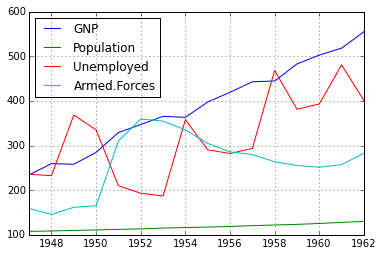

In [4]:
data[['GNP','Population','Unemployed','Armed.Forces']].plot()
plt.show()

We can see that there seems to be a linear relation between Unemployment and both Population & GNP.

## 4. Fitting the model

To build a model, we will use ordinary least squares (OLS) or linear least squares which is a method for estimating the unknown parameters in a linear regression model, with the goal of minimizing the differences between the observed responses in some arbitrary dataset and the responses predicted by the linear approximation of the data

In [5]:
model = smf.ols(formula='Unemployed ~ GNP + Population', data=data).fit()
model.summary()

C:\Users\Alfonso\Anaconda\lib\site-packages\scipy\stats\stats.py:1233: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Unemployed   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     25.75
Date:                Sat, 17 Oct 2015   Prob (F-statistic):           3.01e-05
Time:                        12:57:23   Log-Likelihood:                -81.972
No. Observations:                  16   AIC:                             169.9
Df Residuals:                      13   BIC:                             172.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -5911.4276   1137.982     -5.195      0.000     -8369.888 -3452.967
GNP           -4.0368      0.879     -4.593      0.001        -5.936    -2.138
Population    66.3903     12.559      5.286      0.000        39.258    93.523
==============================================================================
Omnibus:                        0.735   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.692   Jarque-Bera (JB):                0.335
Skew:                          -0.345   Prob(JB):                        0.846
Kurtosis:                       2.838   Cond. No.                     4.20e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We have built a model that makes sense since the R-squared value is high. This means that there is a linear relation between the variables as we expected.

## 5. Influence plots

Influence plots show the (externally) studentized residuals vs. the leverage of each observation as measured by the hat matrix. Externally studentized residuals are residuals that are scaled by their standard deviation.

The influence of each point can be visualized by the criterion keyword argument. Options are Cook's distance and DFFITS, two measures of influence.

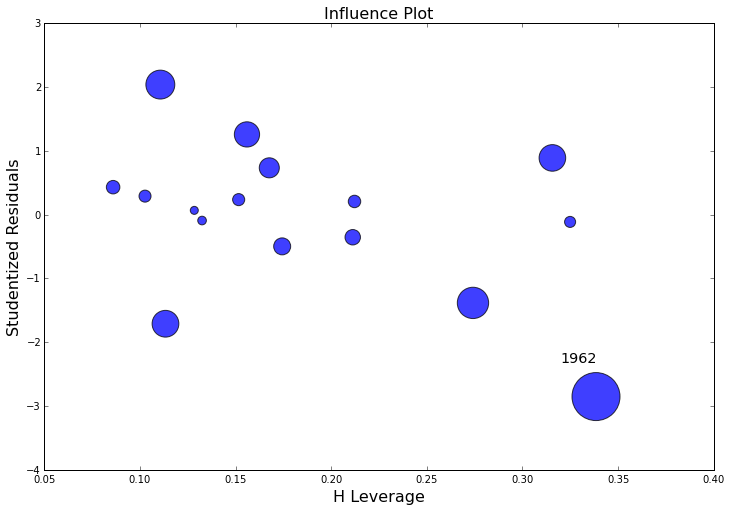

In [6]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, ax=ax, criterion="cooks")

Year 1962 has both high leverage and large residuals, and, therefore, large influence.

## 6. Partial Regression Plots

Since we are doing multivariate regressions, we cannot just look at individual bivariate plots to discern relationships. 
Instead, we want to look at the relationship of the dependent variable and independent variables conditional on the other 
independent variables. We can do this through using partial regression plots, otherwise known as added variable plots. 

In a partial regression plot, to discern the relationship between the response variable and the $k$-th variabe, we compute 
the residuals by regressing the response variable versus the independent variables excluding $X_k$. We can denote this by 
$X_{\sim k}$. We then compute the residuals by regressing $X_k$ on $X_{\sim k}$. The partial regression plot is the plot 
of the former versus the latter residuals. 

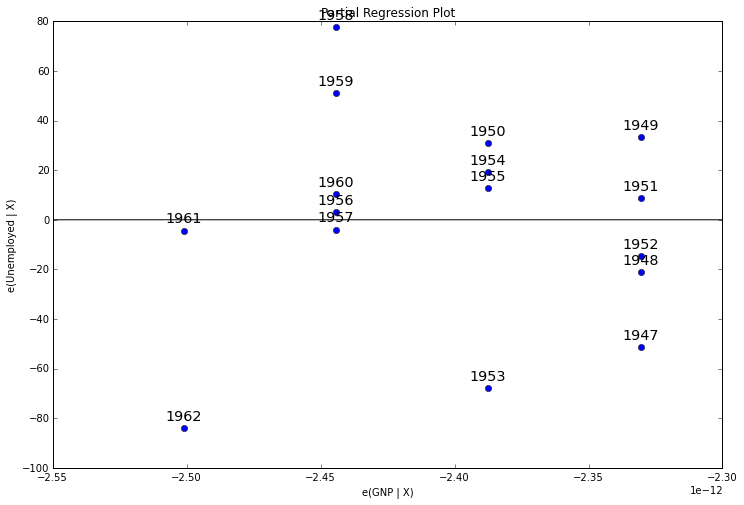

In [7]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.plot_partregress("Unemployed", "GNP", ["GNP", "Population"], data=data, ax=ax)

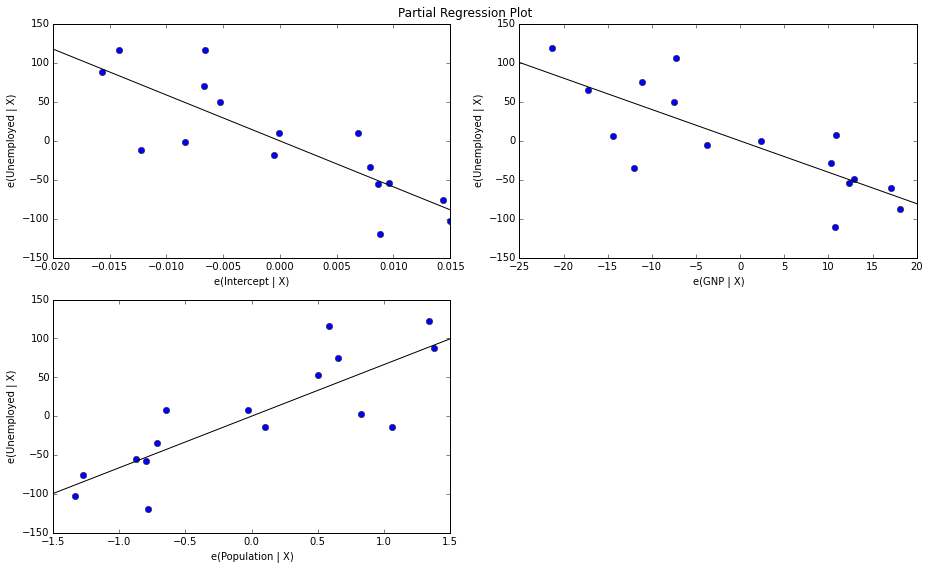

In [8]:
fig = plt.figure(figsize=(13,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

The partial regression plot confirms the year 1962 is an atipic year.
The partial regression plot confirms the influence of the year 1962 on the partial relationship between GNP and Unemployment. The cases greatly decrease the effect of GNP on Unemployment. Dropping these cases confirms this.

In [9]:
subset = ~data.index.isin([1962])
model2 = smf.ols("Unemployed ~ GNP + Population", data=data, subset=subset).fit()
model2.summary()

C:\Users\Alfonso\Anaconda\lib\site-packages\scipy\stats\stats.py:1233: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Unemployed   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     41.24
Date:                Sat, 17 Oct 2015   Prob (F-statistic):           4.20e-06
Time:                        12:57:24   Log-Likelihood:                -73.452
No. Observations:                  15   AIC:                             152.9
Df Residuals:                      12   BIC:                             155.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -6905.4614    978.636     -7.056      0.000     -9037.725 -4773.198
GNP           -4.6186      0.735     -6.282      0.000        -6.220    -3.017
Population    76.8443     10.737      7.157      0.000        53.450   100.239
==============================================================================
Omnibus:                        0.491   Durbin-Watson:                   1.365
Prob(Omnibus):                  0.782   Jarque-Bera (JB):                0.536
Skew:                          -0.338   Prob(JB):                        0.765
Kurtosis:                       2.367   Cond. No.                     4.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

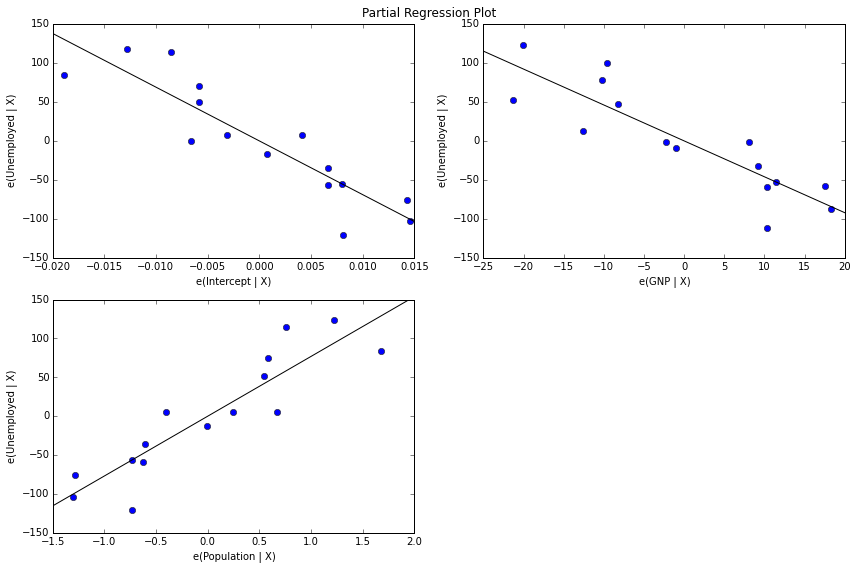

In [10]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model2, fig=fig)

As we can see, the R-squared value of the second model improved upon the R-squared value of the first one, hereby confirming our assumptions that the year 1962 was an outlier of our measures.

## 7. Component-Component plus Residual (CCPR) Plots

The CCPR plot provides a way to judge the effect of one regressor on the 
response variable by taking into account the effects of the other 
independent variables. The partial residuals plot is defined as 
$\text{Residuals} + B_iX_i \text{ }\text{ }$ versus $X_i$. The component adds $B_iX_i$ versus 
$X_i$ to show where the fitted line would lie.

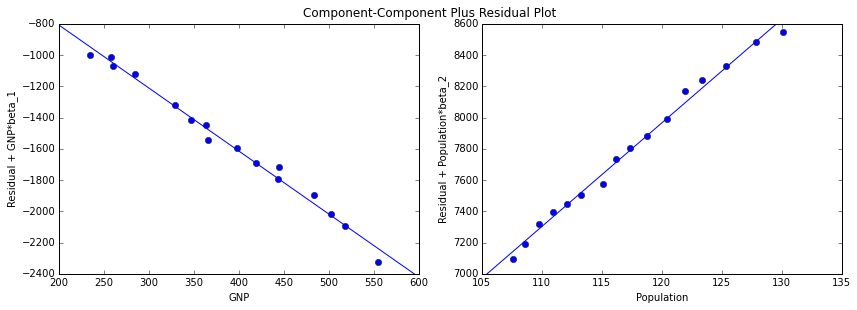

In [11]:
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_ccpr_grid(model, fig=fig)

The relationship between Unemployment and GNP seems to be linear. This is also the case when we compare Unemployment and Population.

## 8. Conclusions

From this simple analysis, we have loaded a dataset from the R datasets repository and after visually inspecting the data, found arguments for relating some variables. In particular, we have constructed a linear model by means of an OLS linear regression that correlates Employment with GNP & Population.

It is interesting, how our analysis found out and outlier in our model in 1962, which can be explained because it was the year the Vietnam War began, hence the Unemployment figures might have been altered by the militar enlistment of unemployed kids within the country.